In [ ]:
import pandas as pd
import numpy as np
import boto3
import matplotlib.pyplot as plt
import seaborn as sns
import itables as itables
import pycaret as py
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:

s3 = boto3.client(

)
# Wczytanie danych z 2023
df_2023 = pd.read_csv(
    "/Users/rafaljaworowski/Desktop/GOTOIT Datascientist kurs AI/Moduł 9 /Zadanie domowe moduł 9/halfmarathon_wroclaw_2023__final.csv",
    sep=";",   # Separator średnik
    encoding="utf-8"
)

# Wczytanie danych z 2024
df_2024 = pd.read_csv(
    "/Users/rafaljaworowski/Desktop/GOTOIT Datascientist kurs AI/Moduł 9 /Zadanie domowe moduł 9/halfmarathon_wroclaw_2024__final.csv",
    sep=";",   # Separator średnik
    encoding="utf-8"
)

In [3]:
itables.show(df_2023.head())

In [4]:
itables.show(df_2024.head())

In [5]:
# Sprawdzenie braków danych
print(df_2024.isnull().sum())

Miejsce                      2707
Numer startowy                  0
Imię                            0
Nazwisko                        0
Miasto                       3094
Kraj                         2707
Drużyna                      8026
Płeć                            9
Płeć Miejsce                 2707
Kategoria wiekowa              20
Kategoria wiekowa Miejsce    2718
Rocznik                       284
5 km Czas                    2719
5 km Miejsce Open            2719
5 km Tempo                   2719
10 km Czas                   2719
10 km Miejsce Open           2719
10 km Tempo                  2728
15 km Czas                   2720
15 km Miejsce Open           2720
15 km Tempo                  2730
20 km Czas                   2712
20 km Miejsce Open           2712
20 km Tempo                  2722
Tempo Stabilność             2740
Czas                         2055
Tempo                        2707
dtype: int64


In [6]:
print(df_2023.columns)

Index(['Miejsce', 'Numer startowy', 'Imię', 'Nazwisko', 'Miasto', 'Kraj',
       'Drużyna', 'Płeć', 'Płeć Miejsce', 'Kategoria wiekowa',
       'Kategoria wiekowa Miejsce', 'Rocznik', '5 km Czas',
       '5 km Miejsce Open', '5 km Tempo', '10 km Czas', '10 km Miejsce Open',
       '10 km Tempo', '15 km Czas', '15 km Miejsce Open', '15 km Tempo',
       '20 km Czas', '20 km Miejsce Open', '20 km Tempo', 'Tempo Stabilność',
       'Czas', 'Tempo'],
      dtype='object')


In [7]:
print(df_2024.columns)

Index(['Miejsce', 'Numer startowy', 'Imię', 'Nazwisko', 'Miasto', 'Kraj',
       'Drużyna', 'Płeć', 'Płeć Miejsce', 'Kategoria wiekowa',
       'Kategoria wiekowa Miejsce', 'Rocznik', '5 km Czas',
       '5 km Miejsce Open', '5 km Tempo', '10 km Czas', '10 km Miejsce Open',
       '10 km Tempo', '15 km Czas', '15 km Miejsce Open', '15 km Tempo',
       '20 km Czas', '20 km Miejsce Open', '20 km Tempo', 'Tempo Stabilność',
       'Czas', 'Tempo'],
      dtype='object')


In [8]:
df_2023 = df_2023.drop(columns=[
    "Imię", "Nazwisko", "Miejsce", "Płeć Miejsce", "Miasto", "Kraj", "Drużyna", "Numer startowy",
    "Kategoria wiekowa", "Kategoria wiekowa Miejsce",
    "5 km Miejsce Open", "10 km Miejsce Open", 
    "15 km Miejsce Open", "20 km Miejsce Open"
], errors="ignore")

df_2024 = df_2024.drop(columns=[
    "Imię", "Nazwisko", "Miejsce", "Płeć Miejsce", "Miasto", "Kraj", "Drużyna", "Numer startowy",
    "Kategoria wiekowa", "Kategoria wiekowa Miejsce",
    "5 km Miejsce Open", "10 km Miejsce Open", 
    "15 km Miejsce Open", "20 km Miejsce Open"
], errors="ignore")


In [9]:
print(df_2024.columns)

Index(['Płeć', 'Rocznik', '5 km Czas', '5 km Tempo', '10 km Czas',
       '10 km Tempo', '15 km Czas', '15 km Tempo', '20 km Czas', '20 km Tempo',
       'Tempo Stabilność', 'Czas', 'Tempo'],
      dtype='object')


In [10]:
print(df_2023.isnull().sum())

Płeć                  2
Rocznik             201
5 km Czas           827
5 km Tempo          827
10 km Czas          811
10 km Tempo         834
15 km Czas          809
15 km Tempo         814
20 km Czas          806
20 km Tempo         813
Tempo Stabilność    840
Czas                  0
Tempo               800
dtype: int64


In [11]:
print(df_2024.columns)

Index(['Płeć', 'Rocznik', '5 km Czas', '5 km Tempo', '10 km Czas',
       '10 km Tempo', '15 km Czas', '15 km Tempo', '20 km Czas', '20 km Tempo',
       'Tempo Stabilność', 'Czas', 'Tempo'],
      dtype='object')


In [12]:
(df_2024.isnull().sum())

Płeć                   9
Rocznik              284
5 km Czas           2719
5 km Tempo          2719
10 km Czas          2719
10 km Tempo         2728
15 km Czas          2720
15 km Tempo         2730
20 km Czas          2712
20 km Tempo         2722
Tempo Stabilność    2740
Czas                2055
Tempo               2707
dtype: int64

In [13]:
itables.show(df_2024)

In [14]:
itables.show(df_2023)

In [15]:
# Definiujemy próg 30% braków
threshold = df_2023.shape[1] * 0.7  # Połowa liczby kolumn

# Usuwamy wiersze z więcej niż 30% brakami
df_2023_cleaned = df_2023.dropna(thresh=threshold)
df_2024_cleaned = df_2024.dropna(thresh=threshold)

# Sprawdzamy, ile wierszy usunęliśmy
print(f"Usunięto {df_2023.shape[0] - df_2023_cleaned.shape[0]} wierszy z df_2023.")
print(f"Usunięto {df_2024.shape[0] - df_2024_cleaned.shape[0]} wierszy z df_2024.")

# Aktualizujemy oryginalne DataFrame
df_2023 = df_2023_cleaned
df_2024 = df_2024_cleaned

Usunięto 837 wierszy z df_2023.
Usunięto 2738 wierszy z df_2024.


In [16]:
(df_2024.isnull().sum())

Płeć                  0
Rocznik             282
5 km Czas             0
5 km Tempo            0
10 km Czas            0
10 km Tempo           0
15 km Czas            0
15 km Tempo           0
20 km Czas            2
20 km Tempo           2
Tempo Stabilność      2
Czas                  0
Tempo                 0
dtype: int64

In [17]:
(df_2023.isnull().sum())

Płeć                  0
Rocznik             200
5 km Czas             0
5 km Tempo            0
10 km Czas            0
10 km Tempo           0
15 km Czas            0
15 km Tempo           0
20 km Czas            3
20 km Tempo           3
Tempo Stabilność      3
Czas                  0
Tempo                 0
dtype: int64

In [18]:
itables.show(df_2024)

In [19]:
print(df_2023["Rocznik"].isnull().sum())  # powinno być 0
print(df_2024["Rocznik"].isnull().sum())  # powinno być 0

200
282


[1992. 1986. 1996. 1988. 1995. 1983. 1999. 1989. 2001. 1997. 1991. 1990.
 1984. 1981. 1974. 1978. 1993. 1985. 1998. 1976. 1970. 1979. 1982. 1987.
 1980. 1994. 2000. 2003.   nan 2002. 1972. 1975. 1977. 1973. 1956.    0.
 2004. 1967. 1971. 1968. 1969. 1962. 1960. 1966. 1963. 1955. 2005. 1954.
 1961. 1964. 1952. 1959. 1957. 1965. 1958. 2006. 1953. 1950. 1949. 1951.
 1944. 1948. 1947. 1943. 1946. 1934.]


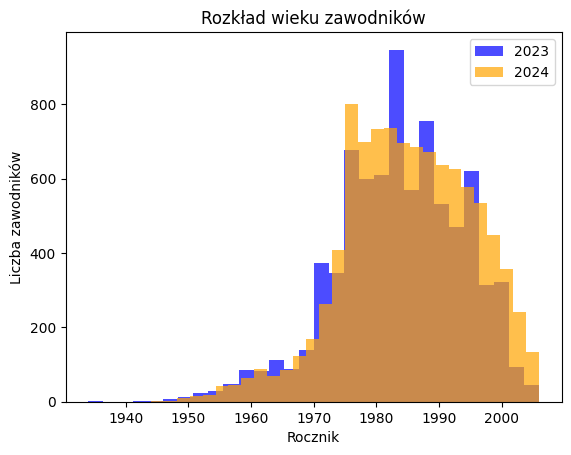

In [20]:

# Sprawdzenie wartości unikalnych
print(df_2023["Rocznik"].unique())

# Naprawa danych (usunięcie błędnych wartości)
df_2023 = df_2023[df_2023["Rocznik"] > 1900]  # Usuwa błędne wartości
df_2024 = df_2024[df_2024["Rocznik"] > 1900]

# Tworzenie histogramu
plt.hist(df_2023["Rocznik"].dropna(), bins=30, alpha=0.7, label="2023", color='blue')
plt.hist(df_2024["Rocznik"].dropna(), bins=30, alpha=0.7, label="2024", color='orange')

plt.xlabel("Rocznik")
plt.ylabel("Liczba zawodników")
plt.title("Rozkład wieku zawodników")
plt.legend()
plt.show()

In [21]:
# Obliczamy medianę rocznika
mediana_rocznik_2023 = df_2023["Rocznik"].median()
mediana_rocznik_2024 = df_2024["Rocznik"].median()

# Uzupełniamy brakujące wartości medianą
df_2023["Rocznik"].fillna(mediana_rocznik_2023, inplace=True)
df_2024["Rocznik"].fillna(mediana_rocznik_2024, inplace=True)

# Sprawdzamy, czy nie ma już braków
print(df_2023["Rocznik"].isnull().sum())
print(df_2024["Rocznik"].isnull().sum())

0
0


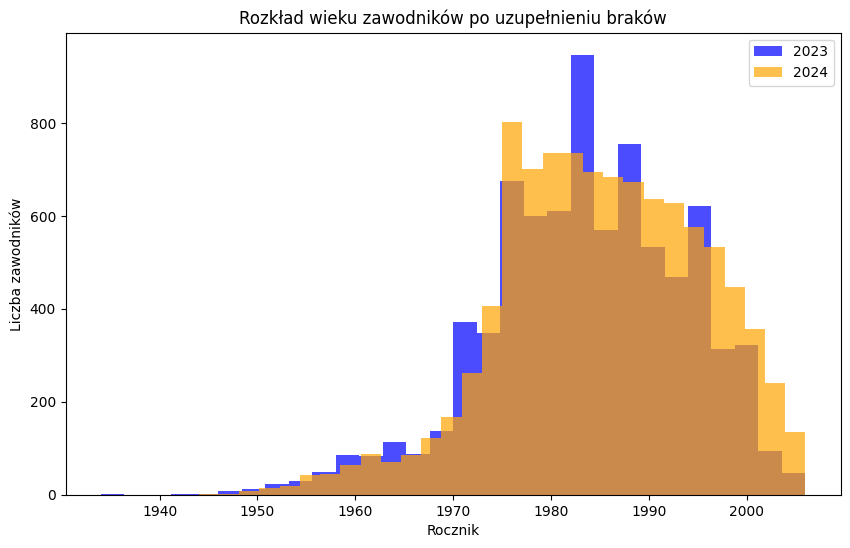

In [22]:

plt.figure(figsize=(10, 6))

# Rysujemy histogram dla obu lat
plt.hist(df_2023["Rocznik"], bins=30, alpha=0.7, label="2023", color="blue")
plt.hist(df_2024["Rocznik"], bins=30, alpha=0.7, label="2024", color="orange")

# Opis osi i tytułu
plt.xlabel("Rocznik")
plt.ylabel("Liczba zawodników")
plt.title("Rozkład wieku zawodników po uzupełnieniu braków")

# Legenda
plt.legend()

# Wyświetlamy histogram
plt.show()

In [23]:
print(df_2023["Rocznik"].isnull().sum())  # powinno być 0
print(df_2024["Rocznik"].isnull().sum())  # powinno być 0

0
0


In [24]:
df_2023["Płeć"] = df_2023["Płeć"].map({"K": 0, "M": 1})
df_2024["Płeć"] = df_2024["Płeć"].map({"K": 0, "M": 1})

In [25]:
print(df_2023["Płeć"].isnull().sum())  # powinno być 0
print(df_2024["Płeć"].isnull().sum())  # powinno być 0

0
0


In [26]:

print(df_2023.head())
print(df_2023.info())  # Sprawdzenie typów danych

   Płeć  Rocznik 5 km Czas  5 km Tempo 10 km Czas  10 km Tempo 15 km Czas  \
0     1   1992.0  00:14:37    2.923333   00:29:15     2.926667   00:44:47   
1     1   1986.0  00:14:48    2.960000   00:29:43     2.983333   00:45:26   
2     1   1996.0  00:15:46    3.153333   00:31:23     3.123333   00:47:34   
3     1   1988.0  00:16:11    3.236667   00:32:10     3.196667   00:48:49   
4     1   1995.0  00:16:12    3.240000   00:32:35     3.276667   00:49:31   

   15 km Tempo 20 km Czas  20 km Tempo  Tempo Stabilność      Czas     Tempo  
0     3.106667   01:01:43     3.386667          0.031400  01:04:59  3.080509  
1     3.143333   01:03:08     3.540000          0.038000  01:06:23  3.146875  
2     3.236667   01:05:09     3.516667          0.024067  01:08:24  3.242475  
3     3.330000   01:06:54     3.616667          0.025467  01:10:16  3.330963  
4     3.386667   01:07:27     3.586667          0.023000  01:10:27  3.339654  
<class 'pandas.core.frame.DataFrame'>
Index: 7905 entries, 0 to

In [27]:
df_2023["20 km Tempo"].fillna(df_2023["20 km Tempo"].median(), inplace=True)
df_2023["Tempo Stabilność"].fillna(df_2023["Tempo Stabilność"].median(), inplace=True)

In [28]:
print(df_2023.isnull().sum())  # powinno pokazać 0

Płeć                0
Rocznik             0
5 km Czas           0
5 km Tempo          0
10 km Czas          0
10 km Tempo         0
15 km Czas          0
15 km Tempo         0
20 km Czas          3
20 km Tempo         0
Tempo Stabilność    0
Czas                0
Tempo               0
dtype: int64


In [29]:
df_2024["20 km Tempo"].fillna(df_2023["20 km Tempo"].median(), inplace=True)
df_2024["Tempo Stabilność"].fillna(df_2023["Tempo Stabilność"].median(), inplace=True)
print(df_2023.isnull().sum())  # powinno pokazać 0

Płeć                0
Rocznik             0
5 km Czas           0
5 km Tempo          0
10 km Czas          0
10 km Tempo         0
15 km Czas          0
15 km Tempo         0
20 km Czas          3
20 km Tempo         0
Tempo Stabilność    0
Czas                0
Tempo               0
dtype: int64


In [2]:
from pycaret.regression import load_model
model = load_model("halfmarathon_model")
print(model.feature_names_in_)

Transformation Pipeline and Model Successfully Loaded
['Płeć', 'Rocznik', '5_km_Czas', '5_km_Tempo', '10_km_Czas', '10_km_Tempo', '15_km_Czas', '15_km_Tempo', '20_km_Czas', '20_km_Tempo', 'Tempo_Stabilność', 'Tempo', 'Czas']


In [4]:
from pycaret.regression import load_model

model = load_model("halfmarathon_model")
print("Model załadowany poprawnie!")

Transformation Pipeline and Model Successfully Loaded
Model załadowany poprawnie!


In [5]:
import pandas as pd
from pycaret.regression import predict_model

# Testowe dane (wprowadź prawidłowe nazwy kolumn)
test_data = pd.DataFrame({
    "Płeć": [1],
    "Rocznik": [1990],
    "5_km_Czas": [1500],
    "5_km_Tempo": [5.0],
    "10_km_Czas": [3200],
    "10_km_Tempo": [5.1],
    "15_km_Czas": [5000],
    "15_km_Tempo": [5.2],
    "20_km_Czas": [6800],
    "20_km_Tempo": [5.3],
    "Tempo_Stabilność": [0.05],
    "Tempo": [5.15]
})

# Sprawdzenie predykcji
prediction = predict_model(model, data=test_data)
print(prediction)

   Płeć  Rocznik  5_km_Czas  5_km_Tempo  10_km_Czas  10_km_Tempo  15_km_Czas  \
0     1     1990       1500         5.0        3200          5.1        5000   

   15_km_Tempo  20_km_Czas  20_km_Tempo  Tempo_Stabilność  Tempo  \
0          5.2        6800          5.3              0.05   5.15   

   prediction_label  
0       6518.355123  
